In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from scipy.stats import pearsonr, spearmanr
import h3pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from warnings import filterwarnings
import matplotlib.colors as colors
import geopandas as gpd 
import sys
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib

from plotting_utils import get_color_dict
color_dict = get_color_dict()

filterwarnings('ignore')
tqdm.pandas()

plt.rcParams.update({'font.family':'arial'})

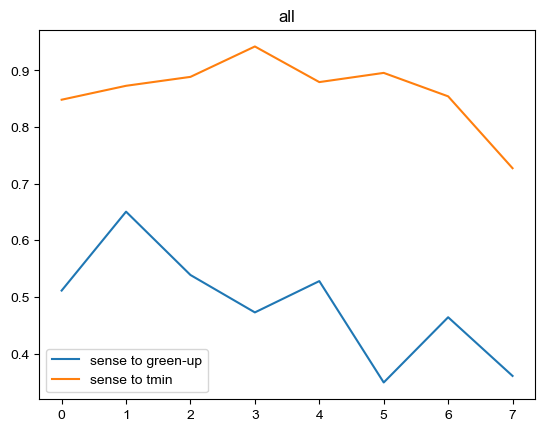

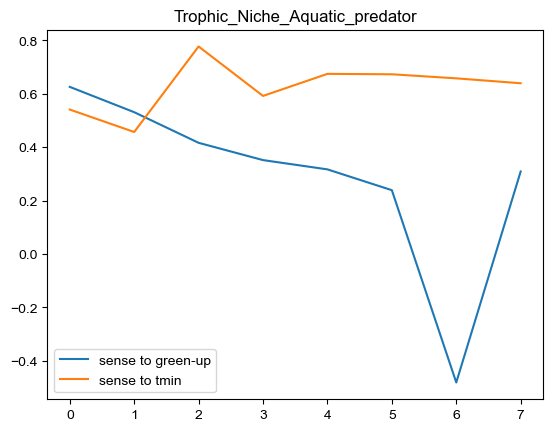

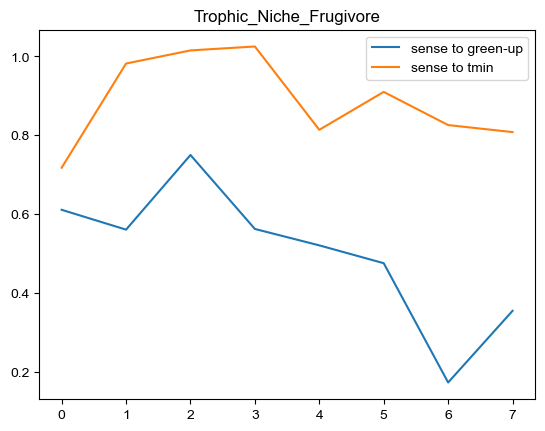

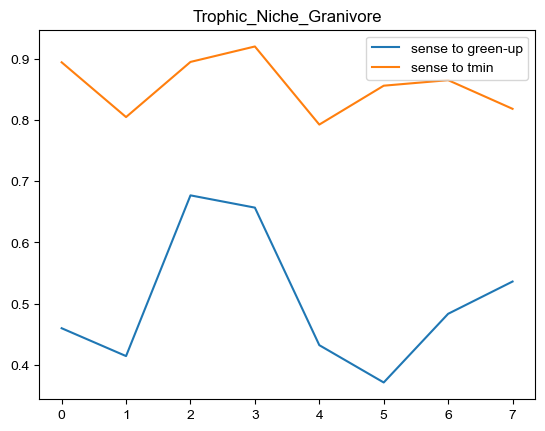

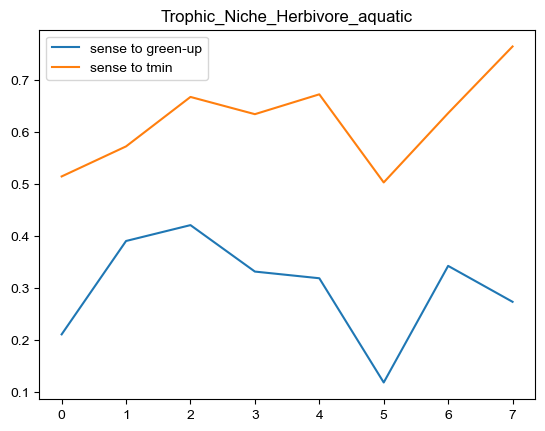

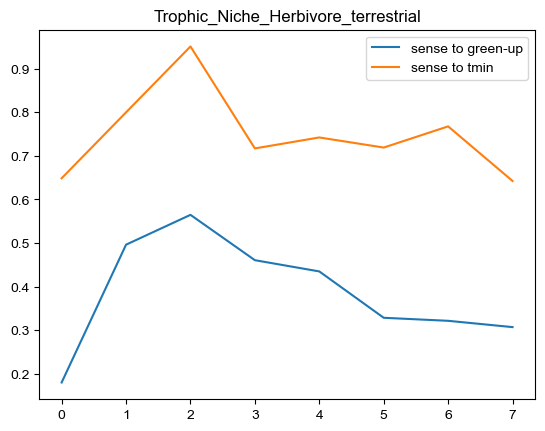

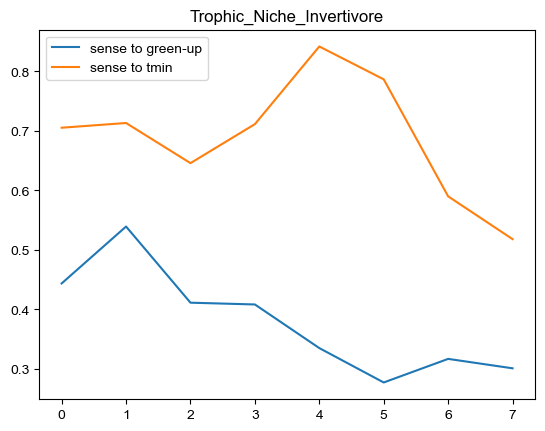

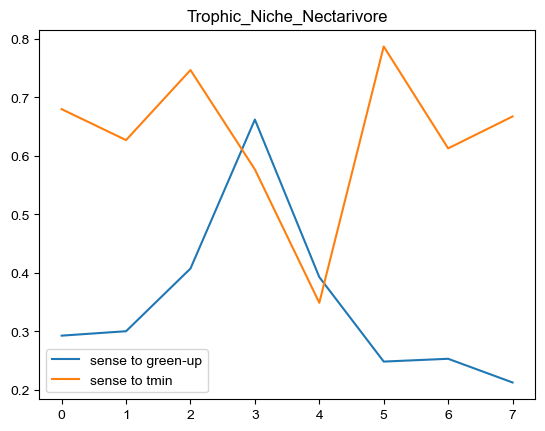

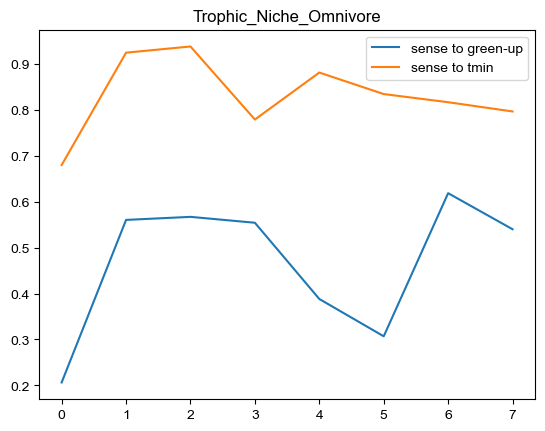

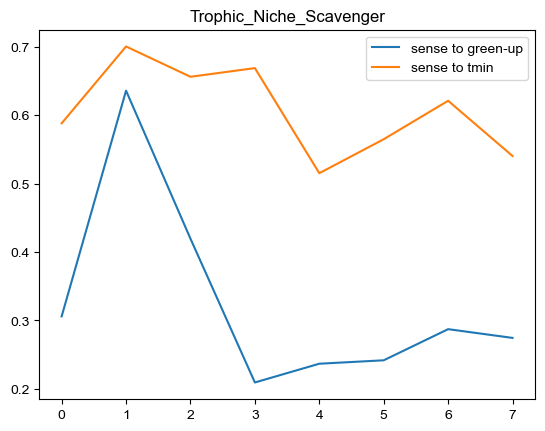

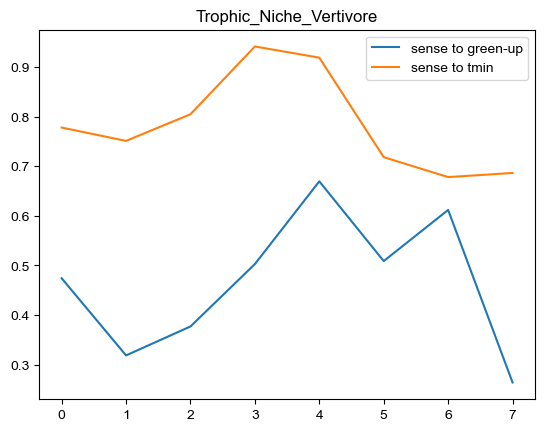

In [51]:
for niche in list(get_color_dict().keys()):
    data = pd.read_csv(f'../../data/D07.BYM2_summary/modeling_data_with_posterior_est_niche_{niche}_env_two_explaining.csv')
    
    def get_reg(df):
        df_ = df[['mean_expected_trace_by_delta_NDVI','mu_ARR']].dropna()
        if len(df_) < 3:
            return None
        # from scipy.stats import pearsonr
        # r,p = pearsonr(df_.iloc[:,0].values.flatten(), df_.iloc[:,1].values.flatten())
        import statsmodels.api as sm
        X = sm.add_constant(df_['mean_expected_trace_by_delta_NDVI'])
        y = df_['mu_ARR']
        model = sm.OLS(y, X).fit()
        model = model.get_robustcov_results()
        return model.params[1]

    tmp_data = data.groupby('h3_02').filter(lambda x:len(x)>7)
    logger1 = []
    for i in range(2010,2018):
        mm = tmp_data[(tmp_data['year'] >= i) & (tmp_data['year'] <= i+2)].groupby(['h3_02']).apply(get_reg).mean()
        logger1.append(mm)

    

    def get_reg(df):
        df_ = df[['mean_expected_trace_by_tmin','mu_ARR']].dropna()
        if len(df_) < 3:
            return None
        # from scipy.stats import pearsonr
        # r,p = pearsonr(df_.iloc[:,0].values.flatten(), df_.iloc[:,1].values.flatten())
        import statsmodels.api as sm
        X = sm.add_constant(df_['mean_expected_trace_by_tmin'])
        y = df_['mu_ARR']
        model = sm.OLS(y, X).fit()
        model = model.get_robustcov_results()
        return model.params[1]

    tmp_data = data.groupby('h3_02').filter(lambda x:len(x)>7)
    logger2 = []
    for i in range(2010,2018):
        mm = tmp_data[(tmp_data['year'] >= i) & (tmp_data['year'] <= i+2)].groupby(['h3_02']).apply(get_reg).mean()
        logger2.append(mm)

    plt.plot(logger1,label='sense to green-up')
    plt.plot(logger2,label='sense to tmin')
    plt.legend()
    plt.title(niche)
    plt.show()
    


In [49]:
# def get_cor(df):
#     df_ = df[['mean_expected_trace_by_delta_NDVI','mean_expected_trace_by_tmin']].dropna()
#     if len(df_) < 3:
#         return None
#     from scipy.stats import pearsonr
#     r,p = pearsonr(df_.iloc[:,0].values.flatten(), df_.iloc[:,1].values.flatten())
#     return r
# data.groupby(['h3_02']).apply(get_cor).hist(bins=100)


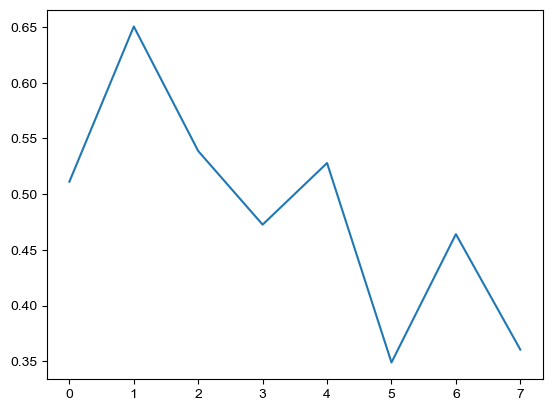

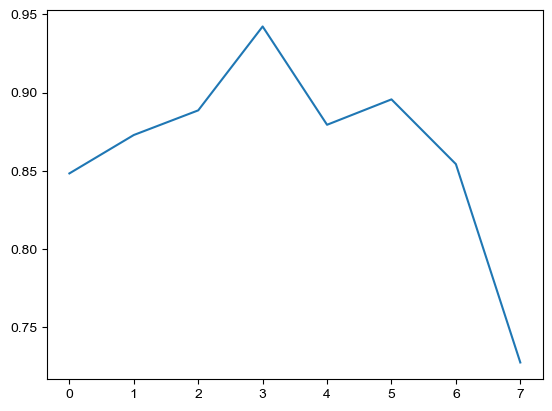

In [3]:
all_data = pd.read_csv('../../data/D07.BYM2_summary/beta_summary_two_explaining.csv')
all_data = all_data[all_data['niche'].isin(list(get_color_dict().keys()))]


In [19]:
all_data

,niche,env_var,season,mu_beta1_mean,mu_beta1_std,mu_beta1_q025,mu_beta1_q975,beta1_lat_mean,beta1_lat_std,beta1_lat_q025,...,mu_beta2_q025,mu_beta2_q975,beta2_lat_mean,beta2_lat_std,beta2_lat_q025,beta2_lat_q975,mu_alpha_mean,mu_alpha_std,mu_alpha_q025,mu_alpha_q975
0,all,two_explaining,spring,0.267010,0.009390,0.248680,0.285278,0.000232,0.000488,-0.000722,...,0.664024,0.708327,-0.003264,0.000513,-0.004262,-0.002229,0.993521,0.120918,0.757396,1.230886
1,Trophic_Niche_Aquatic_predator,two_explaining,spring,0.246544,0.011646,0.223764,0.269422,-0.000624,0.000589,-0.001759,...,0.519278,0.576943,-0.005141,0.000714,-0.006531,-0.003719,0.646883,0.131912,0.387669,0.903304
2,Trophic_Niche_Frugivore,two_explaining,spring,0.353167,0.012181,0.329474,0.377323,0.000241,0.000610,-0.000957,...,0.609813,0.665292,-0.001994,0.000666,-0.003294,-0.000682,0.478060,0.193130,0.101074,0.849201
3,Trophic_Niche_Granivore,two_explaining,spring,0.312940,0.011347,0.290720,0.335251,-0.001088,0.000549,-0.002163,...,0.614151,0.670491,-0.002765,0.000667,-0.004088,-0.001450,0.516097,0.174904,0.180976,0.862747
4,Trophic_Niche_Herbivore_aquatic,two_explaining,spring,0.280905,0.011719,0.258026,0.304030,-0.001480,0.000564,-0.002576,...,0.543252,0.604603,-0.002361,0.000717,-0.003722,-0.000950,0.777542,0.135222,0.514093,1.049486
5,Trophic_Niche_Herbivore_terrestrial,two_explaining,spring,0.280672,0.011602,0.258005,0.303374,-0.000029,0.000545,-0.001080,...,0.562191,0.618780,-0.004229,0.000649,-0.005471,-0.002939,0.592693,0.134882,0.324227,0.854337
6,Trophic_Niche_Invertivore,two_explaining,spring,0.247785,0.009440,0.229109,0.265995,0.000738,0.000527,-0.000283,...,0.556059,0.607467,-0.006732,0.000717,-0.008155,-0.005315,1.133420,0.109643,0.914882,1.347958
7,Trophic_Niche_Nectarivore,two_explaining,spring,0.321067,0.012060,0.297491,0.344598,-0.000178,0.000616,-0.001373,...,0.562706,0.624812,-0.000937,0.000737,-0.002395,0.000505,0.679078,0.163101,0.364865,0.994552
8,Trophic_Niche_Omnivore,two_explaining,spring,0.259833,0.010068,0.240738,0.279726,-0.000482,0.000504,-0.001460,...,0.646398,0.697719,-0.002963,0.000630,-0.004195,-0.001743,0.964252,0.139957,0.696222,1.242560
9,Trophic_Niche_Scavenger,two_explaining,spring,0.320722,0.012066,0.297276,0.344630,0.000098,0.000602,-0.001098,...,0.553868,0.617352,-0.002588,0.000718,-0.004027,-0.001180,0.000689,0.168834,-0.330106,0.329048


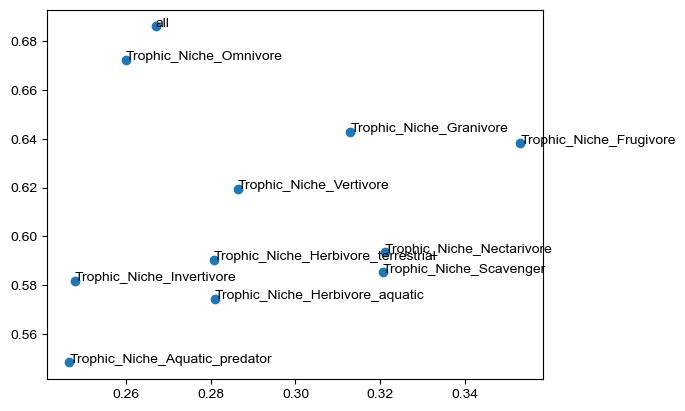

In [20]:
plt.scatter(
    all_data['mu_beta1_mean'],
    all_data['mu_beta2_mean']
)

for index, line in all_data.iterrows():
    plt.annotate(text = line['niche'], xy=(line['mu_beta1_mean'], line['mu_beta2_mean']))
    
    

In [4]:
all_data


,niche,env_var,season,mu_beta1_mean,mu_beta1_std,mu_beta1_q025,mu_beta1_q975,beta1_lat_mean,beta1_lat_std,beta1_lat_q025,...,mu_beta2_q025,mu_beta2_q975,beta2_lat_mean,beta2_lat_std,beta2_lat_q025,beta2_lat_q975,mu_alpha_mean,mu_alpha_std,mu_alpha_q025,mu_alpha_q975
0,all,two_explaining,spring,0.267010,0.009390,0.248680,0.285278,0.000232,0.000488,-0.000722,...,0.664024,0.708327,-0.003264,0.000513,-0.004262,-0.002229,0.993521,0.120918,0.757396,1.230886
1,Trophic_Niche_Aquatic_predator,two_explaining,spring,0.246544,0.011646,0.223764,0.269422,-0.000624,0.000589,-0.001759,...,0.519278,0.576943,-0.005141,0.000714,-0.006531,-0.003719,0.646883,0.131912,0.387669,0.903304
2,Trophic_Niche_Frugivore,two_explaining,spring,0.353167,0.012181,0.329474,0.377323,0.000241,0.000610,-0.000957,...,0.609813,0.665292,-0.001994,0.000666,-0.003294,-0.000682,0.478060,0.193130,0.101074,0.849201
3,Trophic_Niche_Granivore,two_explaining,spring,0.312940,0.011347,0.290720,0.335251,-0.001088,0.000549,-0.002163,...,0.614151,0.670491,-0.002765,0.000667,-0.004088,-0.001450,0.516097,0.174904,0.180976,0.862747
4,Trophic_Niche_Herbivore_aquatic,two_explaining,spring,0.280905,0.011719,0.258026,0.304030,-0.001480,0.000564,-0.002576,...,0.543252,0.604603,-0.002361,0.000717,-0.003722,-0.000950,0.777542,0.135222,0.514093,1.049486
5,Trophic_Niche_Herbivore_terrestrial,two_explaining,spring,0.280672,0.011602,0.258005,0.303374,-0.000029,0.000545,-0.001080,...,0.562191,0.618780,-0.004229,0.000649,-0.005471,-0.002939,0.592693,0.134882,0.324227,0.854337
6,Trophic_Niche_Invertivore,two_explaining,spring,0.247785,0.009440,0.229109,0.265995,0.000738,0.000527,-0.000283,...,0.556059,0.607467,-0.006732,0.000717,-0.008155,-0.005315,1.133420,0.109643,0.914882,1.347958
7,Trophic_Niche_Nectarivore,two_explaining,spring,0.321067,0.012060,0.297491,0.344598,-0.000178,0.000616,-0.001373,...,0.562706,0.624812,-0.000937,0.000737,-0.002395,0.000505,0.679078,0.163101,0.364865,0.994552
8,Trophic_Niche_Omnivore,two_explaining,spring,0.259833,0.010068,0.240738,0.279726,-0.000482,0.000504,-0.001460,...,0.646398,0.697719,-0.002963,0.000630,-0.004195,-0.001743,0.964252,0.139957,0.696222,1.242560
9,Trophic_Niche_Scavenger,two_explaining,spring,0.320722,0.012066,0.297276,0.344630,0.000098,0.000602,-0.001098,...,0.553868,0.617352,-0.002588,0.000718,-0.004027,-0.001180,0.000689,0.168834,-0.330106,0.329048


In [6]:
all_data_geographic = pd.read_csv('../../data/D07.BYM2_summary/beta_geographic_summary_two_explaining.csv')
all_data_geographic = all_data_geographic[all_data_geographic['niche'].isin(list(get_color_dict().keys()))]


<Axes: >

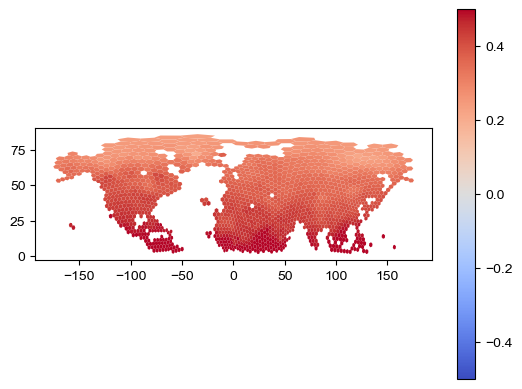

In [11]:
tmp = all_data_geographic[all_data_geographic['niche']=='all'].set_index('h3_02').\
        h3.h3_to_geo_boundary()
tmp['temperature_over_green-up'] = tmp['beta2_mean'] - tmp['beta1_mean']
half = np.quantile(np.abs(tmp['temperature_over_green-up'].values), 0.9)
tmp.plot('temperature_over_green-up',vmax = half, vmin = -half, cmap='coolwarm',legend=True)



<Axes: >

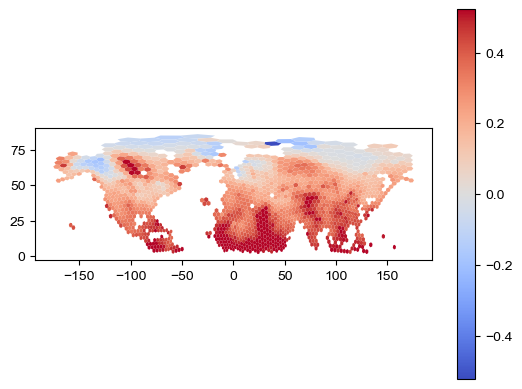

In [14]:
tmp = all_data_geographic[all_data_geographic['niche']=='Trophic_Niche_Invertivore'].set_index('h3_02').\
        h3.h3_to_geo_boundary()
tmp['temperature_over_green-up'] = tmp['beta2_mean'] - tmp['beta1_mean']
half = np.quantile(np.abs(tmp['temperature_over_green-up'].values), 0.9)
tmp.plot('temperature_over_green-up',vmax = half, vmin = -half, cmap='coolwarm',legend=True)



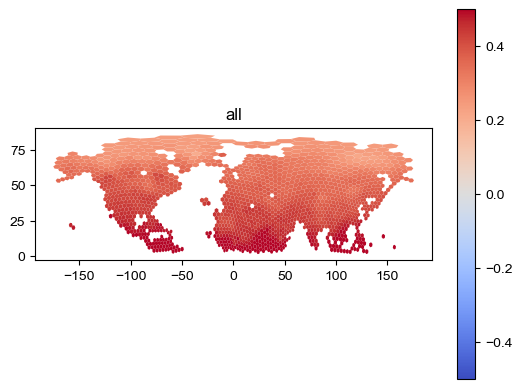

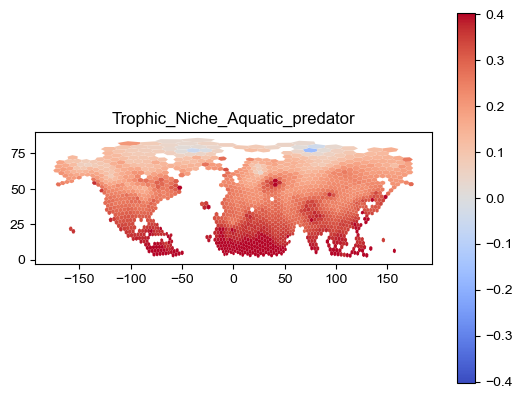

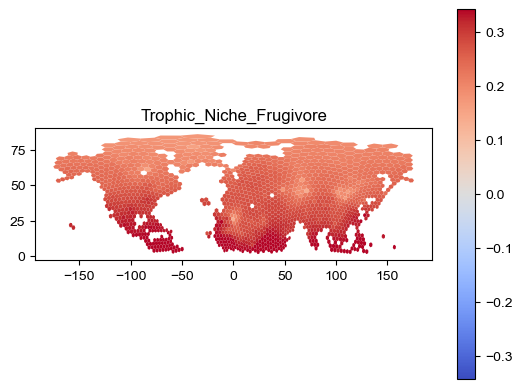

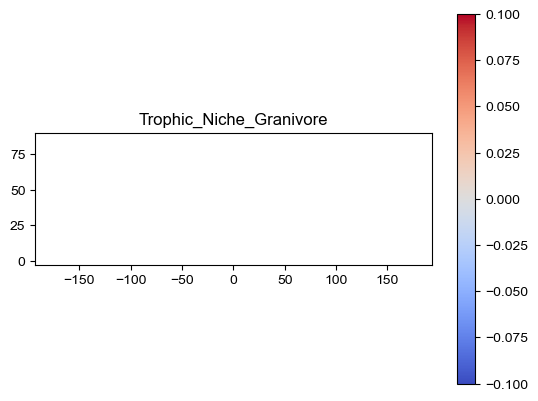

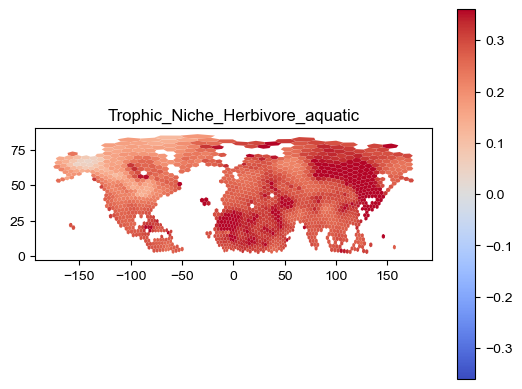

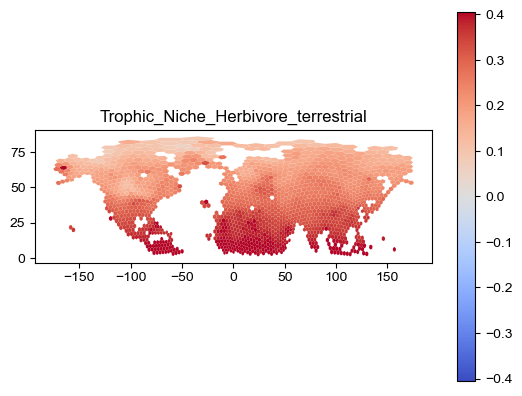

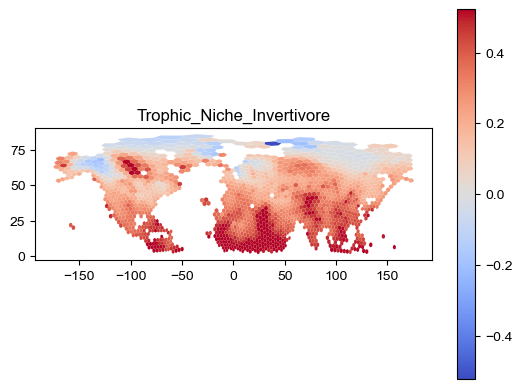

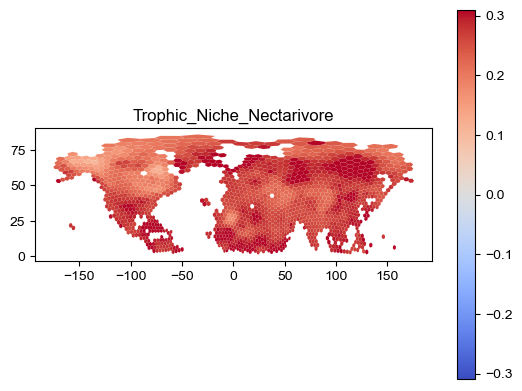

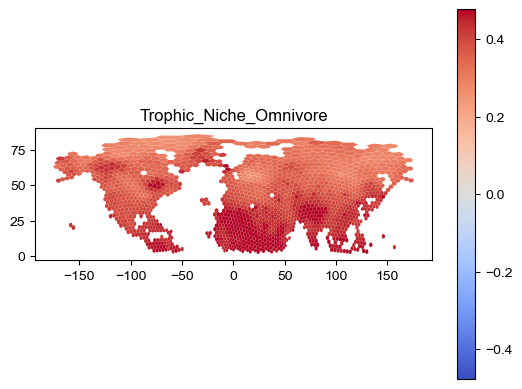

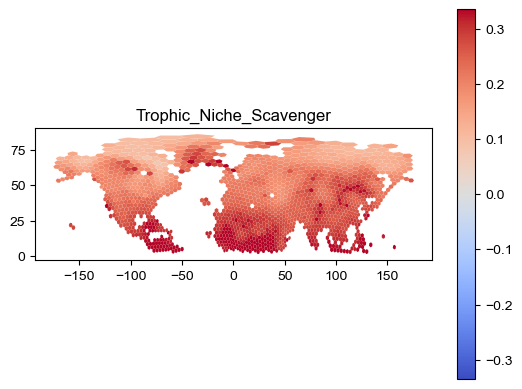

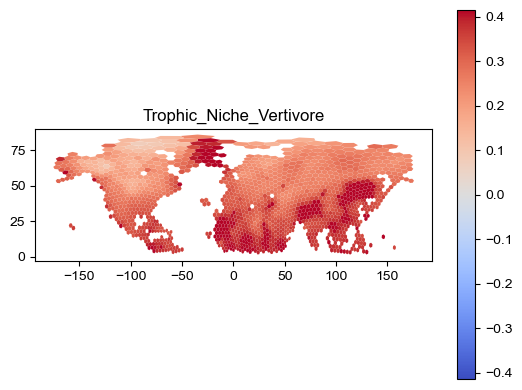

In [18]:
for i in all_data_geographic['niche'].unique():
    tmp = all_data_geographic[all_data_geographic['niche']==i].set_index('h3_02').\
            h3.h3_to_geo_boundary()
    tmp['temperature_over_green-up'] = tmp['beta2_mean'] - tmp['beta1_mean']
    half = np.quantile(np.abs(tmp['temperature_over_green-up'].values), 0.9)
    fig,ax = plt.subplots()
    tmp.plot('temperature_over_green-up',vmax = half, vmin = -half, cmap='coolwarm',legend=True,ax=ax)
    ax.set_title(i)

